# Stack Overflow

## Introduction 

In this assignment, we will look at some posts on Stack Overflow during the year of 2015 and measure the similarity of users by looking at the types of questions they answer. Do not delete the output of your code cells. This assignment is to be completed **INDIVIDUALLY** and it is due on **February 10 at 2:00 PM**. No late submission will be accepted. 

Please update the README with your BU username.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/evimaria/CS506-Spring2007/blob/master/02A-Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [13]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print(response)

<Response [200]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [14]:
print(response.text)

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":179,"user_id":3210431,"user_type":"registered","accept_rate":77,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"http://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":242,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"http://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":737,"answer_count":1,"score":1,"last_activity_date":

It is not possible to read the raw response. Instead, we need to decode the raw response as JSON and use the `json` library to print it.

In [15]:
import json

json_response = response.json()

print(json.dumps(json_response, indent=2))

{
  "quota_remaining": 291,
  "has_more": true,
  "items": [
    {
      "title": "Inserting multiple records into MySQL from an array",
      "view_count": 242,
      "tags": [
        "php",
        "mysql",
        "arrays",
        "mysqli"
      ],
      "owner": {
        "accept_rate": 77,
        "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
        "user_id": 3210431,
        "reputation": 179,
        "display_name": "salep",
        "link": "http://stackoverflow.com/users/3210431/salep",
        "user_type": "registered"
      },
      "creation_date": 1420070458,
      "is_answered": true,
      "answer_count": 2,
      "link": "http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
      "question_id": 27727385,
      "score": 0,
      "accepted_answer_id": 27727478,
      "last_activity_date": 1420071815
    },
    {
      "is_answered": false,
      "title": "Apache Pig ClassCast exception when loading data w

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [16]:
def print_creation_dates_json(response):
    for Question in response["items"]:
        CreationDate = Question["creation_date"]
        print (json.dumps(CreationDate, indent=2))

    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """
    

Write the code that calls the ```print_creation_dates_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). **(5 pts)**

In [17]:
print_creation_dates_json(json_response)

1420070458
1420070503
1420070552
1420070577
1420070611
1420070641
1420070703
1420070727
1420070734
1420070777
1420070801
1420070848
1420070859
1420070866
1420070968
1420071005
1420071029
1420071103
1420071122
1420071175
1420071184
1420071212
1420071230
1420071340
1420071431
1420071530
1420071736
1420071794
1420071830
1420071868
1420071907
1420071929
1420071939
1420072002
1420072021
1420072074
1420072129
1420072243
1420072342
1420072354
1420072397
1420072430
1420072455
1420072481
1420072610
1420072638
1420072667
1420072685
1420072777
1420072779
1420072902
1420072924
1420072976
1420072979
1420072997
1420073055
1420073169
1420073273
1420073276
1420073352
1420073383
1420073425
1420073455
1420073456
1420073492
1420073510
1420073524
1420073787
1420073851
1420073932
1420074037
1420074057
1420074085
1420074170
1420074204
1420074224
1420074226
1420074269
1420074320
1420074334
1420074356
1420074436
1420074492
1420074515
1420074596
1420074602
1420074640
1420074817
1420074822
1420074825
1420074859

Due to time constraints, we have downloaded the [data dump](http://cs-people.bu.edu/bahargam/506/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. The link is only visible to BU students, so you must be logged in to your BU email. Note that the XML file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. You may want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on the whole dataset, you will get a `MemoryError`.

Do not commit the data file. You may assume that we will place the data file in the same directory as your IPython Notebook, so provide a relative path when loading the data file.

Write a function to parse out the questions posted in 2015. These are posts with `PostTypeId=1`. Make a `pandas DataFrame` with 4 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Print out the DataFrame and do not clear the output. **(10 pts)**

In [18]:
import pandas as pd
from lxml import etree
xmlfile = 'stackoverflow-posts-2015.xml'
context = etree.iterparse(xmlfile)
i=0
dataList = []

def tryPartition (StringOrNone):
    if StringOrNone == None:
        return 'None'
    else:
        return StringOrNone.partition('>')[0].partition('<')[2]

for action, elem in context: #for values in the xml, we extract the Id, CreationDate,OwnerUserId and first tag
    if elem.get('PostTypeId') == "1":
        innerDic = {'Id':elem.get('Id'),'CreationDate':elem.get('CreationDate')\
                ,'OwnerUserId':elem.get('OwnerUserId'),'Tags':tryPartition(elem.get('Tags'))}
        dataList.append(innerDic)

    #''' This snippet allowed me to test this code quickly
    i+=1
    if i>20000: # not sure if necessary, but on my machine, the full xml crashes the computer
        break
    #'''
DataF = pd.DataFrame(dataList)
print(DataF)


                 CreationDate        Id OwnerUserId                Tags
0     2015-01-01T00:00:58.253  27727385     3210431                 php
1     2015-01-01T00:01:43.673  27727388      868779          apache-pig
2     2015-01-01T00:02:32.123  27727391     4372672                 ios
3     2015-01-01T00:02:57.983  27727393     2482149          sql-server
4     2015-01-01T00:03:31.337  27727394     4263870                 php
5     2015-01-01T00:04:01.407  27727396     4409381             android
6     2015-01-01T00:05:03.773  27727406      875317                  c#
7     2015-01-01T00:05:27.167  27727407      821742                java
8     2015-01-01T00:05:34.733  27727408     2595033                  c#
9     2015-01-01T00:06:17.720  27727409     1815395              apache
10    2015-01-01T00:06:41.067  27727410      541091               mysql
11    2015-01-01T00:07:28.747  27727414     1210038          javascript
12    2015-01-01T00:07:39.243  27727418     3674356             

-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 100 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize a question by its first tag. You may choose to implement any one of the similarity/distance measures we discussed in class. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

In [19]:
import pandas as pd
import math
import seaborn as sns;
from lxml import etree
xmlfile = 'stackoverflow-posts-2015.xml'
context = etree.iterparse(xmlfile)
i=0
personDic = {}   #Dictionary of the contributors
questionDic = {} #Dictionary of the Questions
Top100 = []      #List of the Top 100 contributors
DistDict = {}    #Dictionary of the Euclidean distance of the top 100 contributors

def tryPartition (StringOrNone):
    if StringOrNone == None:
        return 'none'
    else:
        return StringOrNone.partition('>')[0].partition('<')[2]
    
def EucDistance (vec1, vec2):
    dist = 0
    for x in range(2,len(vec1)):
        dist += (vec1[x]-vec2[x])**2
    return math.sqrt(dist)

for action, elem in context: #for values in the xml, we extract the Id, CreationDate,OwnerUserId and first tag
    if elem.get('PostTypeId') == "2": # if post is an answer
        ID = elem.get('OwnerUserId')
        if ID == None:
            continue
        if not(ID in personDic):
            personDic[ID] = {'..TotalAns' : 0, '..Name' : ID}
        
        parentID = elem.get('ParentId')
        if parentID in questionDic:
            Tag = questionDic[parentID]
        else:
            Tag = 'none'

        if Tag in personDic[ID]:
            personDic[ID][Tag] += 1
        else:
            personDic[ID][Tag] = 1
        
        personDic[ID]['..TotalAns'] += 1

        
    else: # then post is a question
        questionDic[elem.get('Id')]=tryPartition(elem.get('Tags'))
        
    i+=1
    if i>20000:
        break
        

for ID in personDic: # This sorts out the top 100 contributors, and puts them in Top100
    if len(Top100)<100:
        Top100.append(personDic[ID])
    elif personDic[ID]['..TotalAns']>Top100[0]['..TotalAns']:
        Top100[0]=personDic[ID]
        Top100 = sorted(Top100, key=lambda k: k['..TotalAns'])
    Top100 = sorted(Top100, key=lambda k: k['..TotalAns'])
dfTop100 = pd.DataFrame(Top100).fillna(0)

for vectorA in dfTop100.values: # this compares the top 100 contributor's distance
    InnerDict = {}
    for vectorB in dfTop100.values:
        Distance = EucDistance(vectorA,vectorB)
        InnerDict[vectorB[0]] = Distance
    DistDict[vectorA[0]]=InnerDict
dfDistMatrix = pd.DataFrame.from_dict(DistDict) # This is the resulting matrix, comparing the distances
print(dfDistMatrix)

            100297    1009603    1025118    1032492    1144035     115145  \
100297    0.000000  15.652476  13.892444  15.937377  23.388031  20.396078   
1009603  15.652476   0.000000  13.038405   3.316625  22.891046  19.313208   
1025118  13.892444  13.038405   0.000000  13.379088  20.542639  16.522712   
1032492  15.937377   3.316625  13.379088   0.000000  23.086793  19.544820   
1144035  23.388031  22.891046  20.542639  23.086793   0.000000  25.357445   
115145   20.396078  19.313208  16.522712  19.544820  25.357445   0.000000   
118068   15.491933  14.730920  10.908712  14.899664  18.947295  18.761663   
1202025  13.784049  12.922848   7.549834  13.266499  20.856654  10.099505   
1221571  18.466185  17.832555   8.717798  18.083141  24.454039  18.894444   
1222951   7.615773  12.449900   9.000000  12.806248  20.566964  17.492856   
1270695  14.247807  13.416408   8.000000  13.747727  21.447611  18.193405   
1271826  14.142136  13.304135  10.148892  13.638182  21.236761  18.110770   

Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html). **(10 pts)**

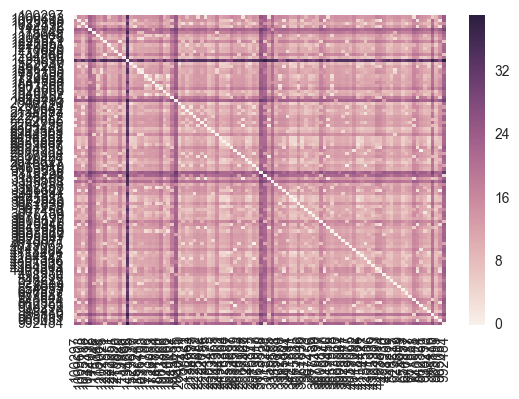

In [20]:
%matplotlib inline
ax = sns.heatmap(dfDistMatrix)

-----------------